In [1]:
import math
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

plt.rcParams["figure.figsize"] = 12, 8

In [102]:
def bounce(vx, vy):
    M  = -np.matrix([[+1, +1],
                     [+1, -1]])
    P  = +np.matrix([[-1,  0],
                     [ 0, +1]])
    Mt = M
    v  = np.matrix([[vx],
                    [vy]])
    return (1/2 * Mt * P * M * v).flatten().tolist()[0]

def intersection_point(x1, y1, x2, y2, x3, y3, x4, y4):
    dxy12 = x1*y2 - y1*x2
    dxy34 = x3*y4 - y3*x4
    dx12  = x1    -    x2
    dx34  = x3    -    x4
    dy34  =    y3 - y4
    dy12  =    y1 - y2

    pxtop   = dxy12 * dx34 - dx12 * dxy34
    pytop   = dxy12 * dy34 - dy12 * dxy34
    pbottom = dx12  * dy34 - dy12 * dx34
    px      = pxtop / pbottom
    py      = pytop / pbottom
    return px, py

In [103]:
for i in [-2, -1, 1, 2]:
    assert bounce(0, i) == [-i,  0], bounce(0, i)
    assert bounce(i, 0) == [ 0, -i], bounce(i, 0)
    assert bounce(i, i) == [-i, -i], bounce(i, i)

485.71428571428606


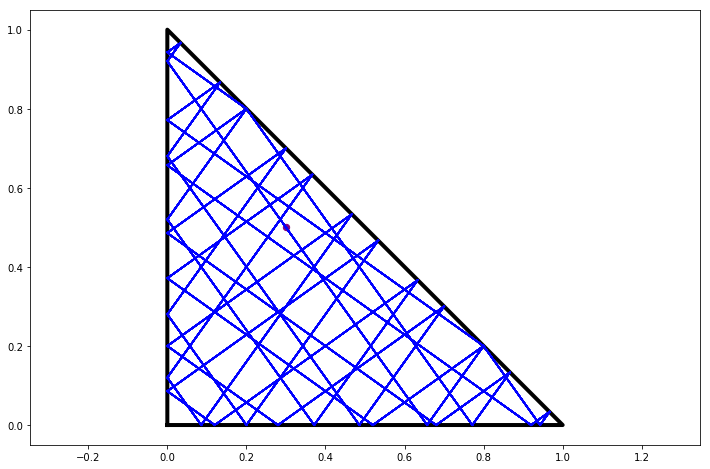

In [107]:
x0, y0  = 0.3,  0.5
vx, vy  = 5.0, -7.0
px, py  = x0, y0

halfpi     = math.pi   / 2
quarterpi  = halfpi    / 2
quarterpi3 = quarterpi * 3

fig = plt.figure()
plt.plot([0, 1, 0, 0], [0, 0, 1, 0], "k-", lw=4)
plt.scatter(px, py, marker="o", s=40, color="purple")

for i in range(1000):
    x1, y1 =      px,      py
    x2, y2 = x1 + vx, y1 + vy

    phi = math.atan2(vy, vx)
    if   0 <= phi < halfpi:
        vx, vy = bounce(vx, vy)
        px, py = intersection_point(x1, y1, x2, y2, 1, 0, 0, 1)

    elif -halfpi <= phi < -quarterpi:
        vy = -vy
        px, py = intersection_point(x1, y1, x2, y2, 0, 0, 1, 0)

    elif halfpi3 < phi:
        vx = -vx
        px, py = intersection_point(x1, y1, x2, y2, 0, 0, 0, 1)

    elif -quarterpi <= phi < 0:
        px, py = intersection_point(x1, y1, x2, y2, 0, 0, 1, 0)
        vy     = -vy
        if not (0 <= px <= 1):
            px, py = intersection_point(x1, y1, x2, y2, 1, 0, 0, 1)
            vx, vy = bounce(vx, -vy)

    elif phi < -halfpi:
        px, py = intersection_point(x1, y1, x2, y2, 0, 0, 0, 1)
        vx     = -vx
        if not (0 <= py <= 1):
            px, py = intersection_point(x1, y1, x2, y2, 0, 0, 1, 0)
            vx, vy = -vx, -vy

    elif halfpi <= phi < halfpi3:
        px, py = intersection_point(x1, y1, x2, y2, 0, 0, 0, 1)
        vx     = -vx
        if not (0 <= py <= 1):
            px, py = intersection_point(x1, y1, x2, y2, 1, 0, 0, 1)
            vx, vy = bounce(-vx, vy)

    else:
        print(f"Something went wrong:\n"
              f"(x1, y1) = ({x1} {y1}), (x2, y2) = ({x2} {y2}),\n"
              f"(x3, y3) = ({x3} {y3}), (x4, y4) = ({x4} {y4})"   )

    plt.plot([x1, px], [y1, py], "b-", figure=fig)
    plt.axis("equal")
#    plt.show()
print(1000 * (px + py))